Install and imports

In [12]:
# Task 1: Data Merge
# Author: Mariam Awini Issah
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Paths and load data

In [13]:
# Step 2: Load raw data
social = pd.read_csv("C:/Users/awini/formative2-mlp/data/raw/customer_social_profiles.csv")
trans = pd.read_csv("C:/Users/awini/formative2-mlp/data/raw/customer_transactions.csv")

# Quick overview
print("Social data shape:", social.shape)
print("Transaction data shape:", trans.shape)

# First few rows
display(social.head())
display(trans.head())

# Basic info
print("\n Social Info ")
display(social.info())

print("\n Transactions Info ")
display(trans.info())

# Summary statistics
display(social.describe(include='all'))
display(trans.describe(include='all'))


Social data shape: (155, 5)
Transaction data shape: (150, 6)


,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,A178,LinkedIn,74,4.9,Positive
1,A190,Twitter,82,4.8,Neutral
2,A150,Facebook,96,1.6,Positive
3,A162,Twitter,89,2.6,Positive
4,A197,Twitter,92,2.3,Neutral


,customer_id_new,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3



 Social Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id_new          155 non-null    object 
 1   social_media_platform    155 non-null    object 
 2   engagement_score         155 non-null    int64  
 3   purchase_interest_score  155 non-null    float64
 4   review_sentiment         155 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.2+ KB


None


 Transactions Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id_new   150 non-null    int64  
 1   transaction_id    150 non-null    int64  
 2   purchase_amount   150 non-null    int64  
 3   purchase_date     150 non-null    object 
 4   product_category  150 non-null    object 
 5   customer_rating   140 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.2+ KB


None

,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
count,155,155,155.000000,155.000000,155
unique,84,5,NaN,NaN,3
top,A155,Twitter,NaN,NaN,Positive
freq,7,38,NaN,NaN,63
mean,NaN,NaN,75.606452,3.152903,NaN
std,NaN,NaN,14.568021,1.142867,NaN
min,NaN,NaN,50.000000,1.000000,NaN
25%,NaN,NaN,63.500000,2.350000,NaN
50%,NaN,NaN,77.000000,3.200000,NaN
75%,NaN,NaN,87.500000,4.100000,NaN


,customer_id_new,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
count,150.000000,150.000000,150.000000,150,150,140.00000
unique,NaN,NaN,NaN,150,5,NaN
top,NaN,NaN,NaN,2024-01-01,Sports,NaN
freq,NaN,NaN,NaN,1,35,NaN
mean,148.760000,1075.500000,280.780000,NaN,NaN,2.98500
std,30.046425,43.445368,121.329595,NaN,NaN,1.20699
min,100.000000,1001.000000,51.000000,NaN,NaN,1.00000
25%,121.250000,1038.250000,179.000000,NaN,NaN,1.95000
50%,150.500000,1075.500000,274.000000,NaN,NaN,3.00000
75%,174.750000,1112.750000,388.500000,NaN,NaN,4.00000


Cleaning of customer IDs Data.

In [14]:
# Step 3: Clean customer IDs 

# Step: Clean social customer IDs

# Convert to string first (to safely use str methods)
social['customer_id_new'] = social['customer_id_new'].astype(str)

# Remove any non-numeric characters (like 'A') and convert to int
social['customer_id_new'] = social['customer_id_new'].str.extract(r'(\d+)').astype(int)

# Ensure transaction IDs are also int (already numeric, but just to be safe)
trans['customer_id_new'] = trans['customer_id_new'].astype(int)

# Quick check
print("Social IDs sample:", social['customer_id_new'].head())
print("Transaction IDs sample:", trans['customer_id_new'].head())


Social IDs sample: 0    178
1    190
2    150
3    162
4    197
Name: customer_id_new, dtype: int64
Transaction IDs sample: 0    151
1    192
2    114
3    171
4    160
Name: customer_id_new, dtype: int64


Merging the column from customer and social data.

In [15]:

# Merge on this column
merged_df = pd.merge(social, trans, on='customer_id_new', how='inner')

print("Merged data shape:", merged_df.shape)
display(merged_df.head())

Merged data shape: (219, 10)


,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,190,Twitter,82,4.8,Neutral,1031,333,2024-01-31,Groceries,3.8
1,190,Twitter,82,4.8,Neutral,1140,401,2024-05-19,Sports,4.9
2,150,Facebook,96,1.6,Positive,1042,389,2024-02-11,Sports,NaN
3,150,Facebook,96,1.6,Positive,1046,177,2024-02-15,Books,3.6
4,162,Twitter,89,2.6,Positive,1079,101,2024-03-19,Books,4.2


Data validation

In [16]:
# Step 4: Data validation

# Check for missing values
print("Missing values in social dataset:")
print(social.isna().sum())
print("\nMissing values in transaction dataset:")
print(trans.isna().sum())

# Check for duplicates
print("\nDuplicate customer IDs in social dataset:", social['customer_id_new'].duplicated().sum())
print("Duplicate customer IDs in transaction dataset:", trans['customer_id_new'].duplicated().sum())

# Check unmatched IDs before merge (optional)
unmatched_social = set(social['customer_id_new']) - set(trans['customer_id_new'])
unmatched_trans = set(trans['customer_id_new']) - set(social['customer_id_new'])
print("\nSocial IDs not in transactions:", unmatched_social)
print("Transaction IDs not in social:", unmatched_trans)

# Quick statistics for numeric columns
print("\nSocial dataset stats:")
display(social.describe())

print("\nTransaction dataset stats:")
display(trans.describe())



Missing values in social dataset:
customer_id_new            0
social_media_platform      0
engagement_score           0
purchase_interest_score    0
review_sentiment           0
dtype: int64

Missing values in transaction dataset:
customer_id_new      0
transaction_id       0
purchase_amount      0
purchase_date        0
product_category     0
customer_rating     10
dtype: int64

Duplicate customer IDs in social dataset: 71
Duplicate customer IDs in transaction dataset: 75

Social IDs not in transactions: {131, 142, 145, 155, 156, 165, 166, 167, 168, 169, 176, 178, 193, 195, 196, 197, 109, 112, 115, 116, 118, 124, 126}
Transaction IDs not in social: {161, 164, 134, 136, 170, 171, 108, 110, 175, 184, 153, 123, 157, 159}

Social dataset stats:


,customer_id_new,engagement_score,purchase_interest_score
count,155.000000,155.000000,155.000000
mean,148.625806,75.606452,3.152903
std,29.404291,14.568021,1.142867
min,100.000000,50.000000,1.000000
25%,123.000000,63.500000,2.350000
50%,150.000000,77.000000,3.200000
75%,175.000000,87.500000,4.100000
max,199.000000,99.000000,5.000000



Transaction dataset stats:


,customer_id_new,transaction_id,purchase_amount,customer_rating
count,150.000000,150.000000,150.000000,140.00000
mean,148.760000,1075.500000,280.780000,2.98500
std,30.046425,43.445368,121.329595,1.20699
min,100.000000,1001.000000,51.000000,1.00000
25%,121.250000,1038.250000,179.000000,1.95000
50%,150.500000,1075.500000,274.000000,3.00000
75%,174.750000,1112.750000,388.500000,4.00000
max,199.000000,1150.000000,495.000000,5.00000


Handle duplicates and merge 

In [17]:
# Step 5: Handle duplicates and merge 

# Aggregate social data to one row per customer
social_agg = social.groupby('customer_id_new').agg({
    'social_media_platform': lambda x: ','.join(x.unique()),  # keep all platforms as string
    'engagement_score': 'mean',
    'purchase_interest_score': 'mean',
    'review_sentiment': lambda x: ','.join(x.unique())
}).reset_index()

print("Social data after aggregation:", social_agg.shape)
display(social_agg.head())

# Merge with transaction data (keep all transactions for each customer)
merged_df = pd.merge(
    social_agg,
    trans,
    on='customer_id_new',
    how='inner'
)

print("Merged dataset shape:", merged_df.shape)
display(merged_df.head())


Social data after aggregation: (84, 5)


,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,100,"Twitter,Instagram",77.000000,4.400000,"Negative,Neutral"
1,101,Twitter,68.000000,1.000000,Neutral
2,102,LinkedIn,51.000000,4.800000,Neutral
3,103,"Instagram,Facebook",64.333333,2.866667,"Positive,Negative"
4,104,"Twitter,Facebook",83.000000,2.933333,"Negative,Neutral"


Merged dataset shape: (117, 10)


,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,100,"Twitter,Instagram",77.0,4.4,"Negative,Neutral",1113,172,2024-04-22,Clothing,4.0
1,100,"Twitter,Instagram",77.0,4.4,"Negative,Neutral",1147,387,2024-05-26,Books,4.6
2,101,Twitter,68.0,1.0,Neutral,1017,271,2024-01-17,Books,2.1
3,101,Twitter,68.0,1.0,Neutral,1021,192,2024-01-21,Groceries,3.4
4,101,Twitter,68.0,1.0,Neutral,1059,408,2024-02-28,Books,2.5


In [18]:
# Shell 6 (after merging, before saving)
# Fill missing customer_rating
merged_df['customer_rating'] = merged_df['customer_rating'].fillna(merged_df['customer_rating'].median())


The merged and saved dataset

In [19]:
# Shell 6: Save merged dataset with full path 
import os

# Full path to processed folder
processed_path = "C:/Users/awini/formative2-mlp/data/processed"
os.makedirs(processed_path, exist_ok=True)

# Save merged dataset
merged_df.to_csv(f"{processed_path}/merged_customer_data.csv", index=False)

print(f" Merged dataset saved at '{processed_path}/merged_customer_data.csv'")

 Merged dataset saved at 'C:/Users/awini/formative2-mlp/data/processed/merged_customer_data.csv'


Quick data overview and visual insights.

Merged dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id_new          117 non-null    int64  
 1   social_media_platform    117 non-null    object 
 2   engagement_score         117 non-null    float64
 3   purchase_interest_score  117 non-null    float64
 4   review_sentiment         117 non-null    object 
 5   transaction_id           117 non-null    int64  
 6   purchase_amount          117 non-null    int64  
 7   purchase_date            117 non-null    object 
 8   product_category         117 non-null    object 
 9   customer_rating          117 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 9.3+ KB

Summary statistics:


,customer_id_new,engagement_score,purchase_interest_score,transaction_id,purchase_amount,customer_rating
count,117.000000,117.000000,117.000000,117.00000,117.000000,117.000000
mean,147.914530,73.981909,3.085997,1074.25641,287.905983,3.129060
std,32.288722,12.598660,1.046239,44.27328,120.084165,1.196263
min,100.000000,50.000000,1.000000,1001.00000,62.000000,1.000000
25%,117.000000,66.400000,2.666667,1036.00000,183.000000,2.100000
50%,146.000000,77.000000,3.133333,1073.00000,280.000000,3.300000
75%,180.000000,83.000000,3.850000,1113.00000,397.000000,4.100000
max,199.000000,99.000000,4.800000,1150.00000,495.000000,5.000000


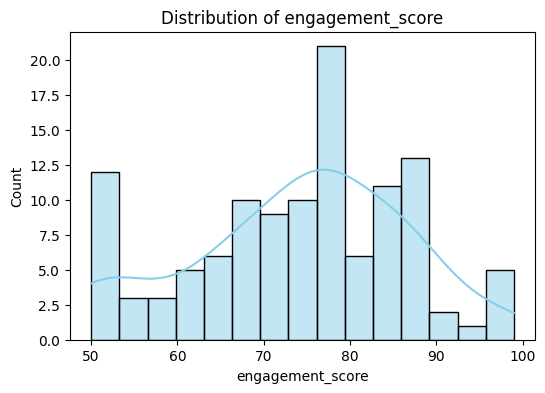

Insight: engagement_score has mean=73.98, median=77.00, and is left-skewed (skew=-0.30).


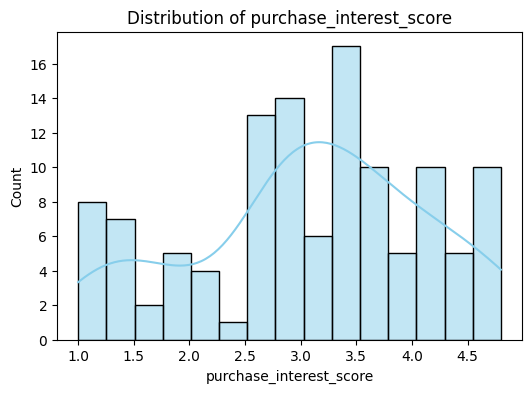

Insight: purchase_interest_score has mean=3.09, median=3.13, and is left-skewed (skew=-0.32).


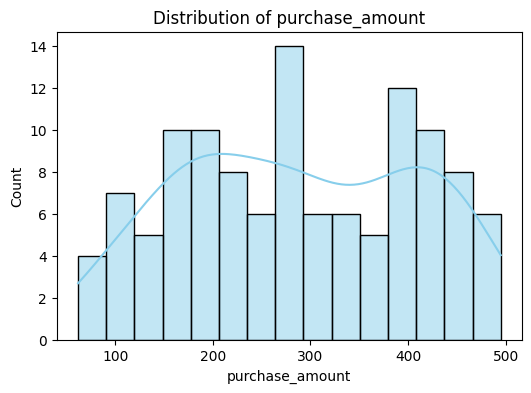

Insight: purchase_amount has mean=287.91, median=280.00, and is left-skewed (skew=-0.01).


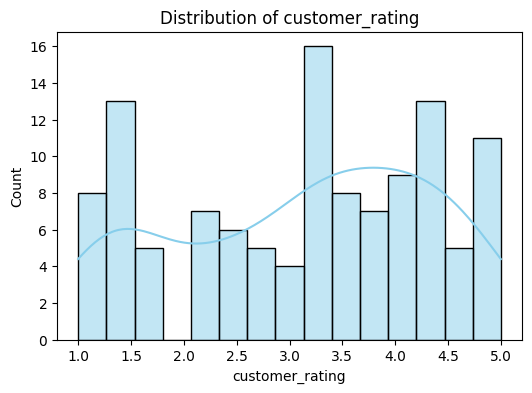

Insight: customer_rating has mean=3.13, median=3.30, and is left-skewed (skew=-0.30).


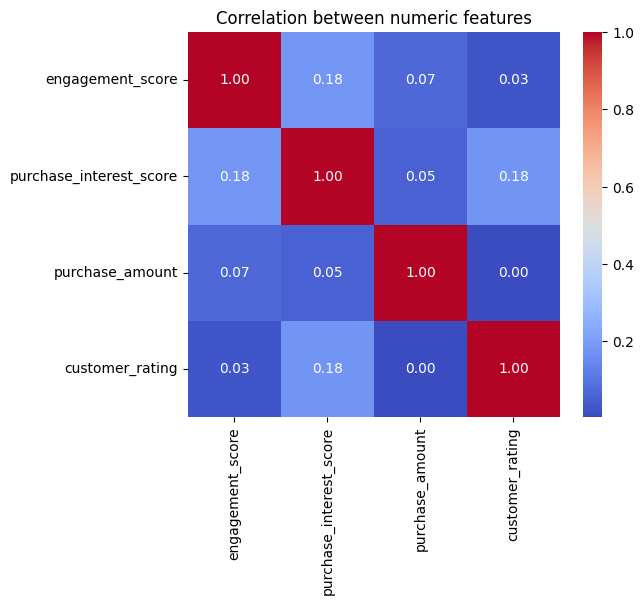

C:\Users\awini\AppData\Local\Temp\ipykernel_20812\2049215638.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_platforms, order=all_platforms.value_counts().index, palette='Set2')


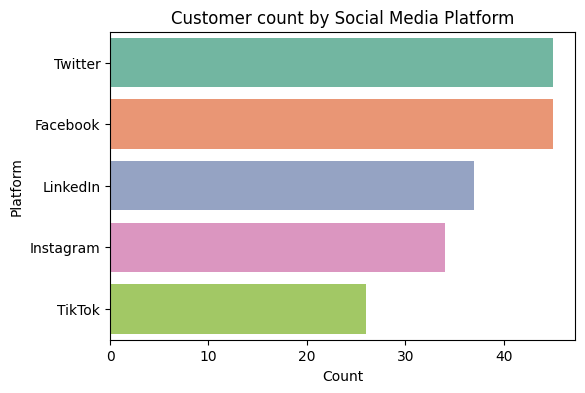

C:\Users\awini\AppData\Local\Temp\ipykernel_20812\2049215638.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, y='product_category', palette='Set3', order=merged_df['product_category'].value_counts().index)


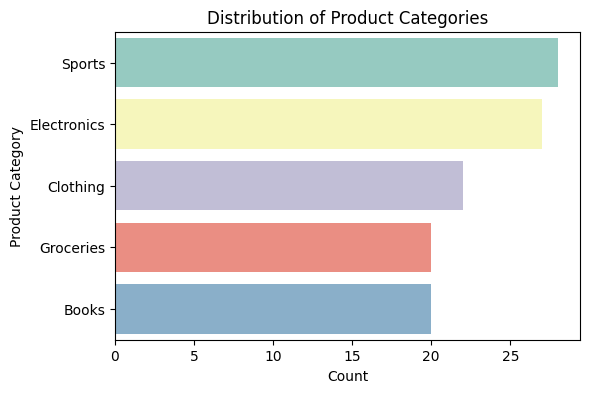

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Quick overview 
print("Merged dataset info:")
merged_df.info()

print("\nSummary statistics:")
display(merged_df.describe())

# Step 1b: Handle missing values 
# Fill missing customer_rating with the median
if merged_df['customer_rating'].isna().sum() > 0:
    median_rating = merged_df['customer_rating'].median()
    merged_df['customer_rating'].fillna(median_rating, inplace=True)
    print(f"Filled missing customer_rating values with median: {median_rating}")

# Step 2: Distribution of numeric variables with insights 
numeric_cols = ['engagement_score', 'purchase_interest_score', 'purchase_amount', 'customer_rating']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(merged_df[col], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    # Add insight
    mean_val = merged_df[col].mean()
    median_val = merged_df[col].median()
    skew_val = merged_df[col].skew()
    skew_desc = 'right-skewed' if skew_val > 0 else 'left-skewed' if skew_val < 0 else 'roughly symmetric'
    print(f"Insight: {col} has mean={mean_val:.2f}, median={median_val:.2f}, and is {skew_desc} (skew={skew_val:.2f}).")

# Step 3: Correlation heatmap 
plt.figure(figsize=(6,5))
corr = merged_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between numeric features")
plt.show()

# Step 4: Count of customers by social media platform 
plt.figure(figsize=(6,4))
# split multiple platforms into individual entries
all_platforms = merged_df['social_media_platform'].str.split(',', expand=True).stack()
sns.countplot(y=all_platforms, order=all_platforms.value_counts().index, palette='Set2')
plt.title("Customer count by Social Media Platform")
plt.xlabel("Count")
plt.ylabel("Platform")
plt.show()

# Step 5: Product category distribution 
plt.figure(figsize=(6,4))
sns.countplot(data=merged_df, y='product_category', palette='Set3', order=merged_df['product_category'].value_counts().index)
plt.title("Distribution of Product Categories")
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.show()
